# Perfilamiento y preprocesamiento de los datos

En este notebook se realizará el perfilamiento y preprocesamiento de los datos suministrados de la base de datos

## Carga de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder


Carga del archivo:

In [4]:
datosoriginal= pd.read_csv('C:/Users/Camila/Documents/Universidad/Septimo semestre/BI/Proyecto/Proyecto 2 etapa 2/data_2010_2017.csv', sep=',', encoding = 'utf-8')
datosoriginal.info()

C:\Users\Camila\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   anio           1048575 non-null  object 
 1   codigo_depto   733847 non-null   object 
 2   nombre_depto   733847 non-null   object 
 3   nombre_muni    733847 non-null   object 
 4   codigo_muni    733847 non-null   object 
 5   codigo_evento  733847 non-null   object 
 6   evento         733847 non-null   object 
 7   edad           733847 non-null   object 
 8   sexo           733847 non-null   object 
 9   num_casos      733847 non-null   float64
dtypes: float64(1), object(9)
memory usage: 80.0+ MB


In [35]:
print(datosoriginal.shape)

(1244984, 10)


In [36]:
datosoriginal.head(50)

,anio,codigo_depto,nombre_depto,nombre_muni,codigo_muni,codigo_evento,evento,edad,sexo,num_casos
0,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,200524.0
1,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,Hombres,114264.0
2,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,Mujeres,86250.0
3,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,Indeterminado,10.0
4,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,Menor 1 año,Hombres,4745.0
5,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,Menor 1 año,Mujeres,3607.0
6,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,Menor 1 año,Indeterminado,3.0
7,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,De 1-4 años,Hombres,1027.0
8,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,De 1-4 años,Mujeres,886.0
9,2010,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,De 5-14 años,Hombres,1434.0


In [37]:
datosoriginal.isnull().sum()

anio             0
codigo_depto     0
nombre_depto     0
nombre_muni      0
codigo_muni      0
codigo_evento    0
evento           0
edad             0
sexo             0
num_casos        0
dtype: int64

In [38]:
#¿Cuántos extranjeros?
for cols in datosoriginal:
    print(datosoriginal[cols].value_counts())

2016    172110
2015    169734
2014    155936
2010    155106
2013    152821
2011    152263
2012    151523
2017    135491
Name: anio, dtype: int64
05             134708
25             107029
76              73568
15              52341
68              42495
73              42159
52              41485
41              39505
19              38534
23              34667
13              29800
15              29679
47              27816
68              26891
17              25818
20              25647
50              24961
08              23859
54              22378
52              19496
27              19246
70              19015
85              17959
13              17499
44              17394
54              17186
86              16530
5               16434
66              16210
73              14990
18              14565
17              13423
63              12799
19              12650
8               12475
81              12172
70              11598
23              10892
66               99

In [39]:
#Manejo extranjeros y total
for col in datosoriginal.columns:
    datosoriginal.drop(datosoriginal.loc[datosoriginal[col]=='TOTAL'].index,inplace=True)

In [40]:
#Extranjeros
datosoriginal["codigo_depto"]=datosoriginal.codigo_depto.replace({'Extranjeros':1001})
datosoriginal["codigo_muni"]=datosoriginal.codigo_muni.replace({'Extranjeros':1001})


In [41]:
for cols in datosoriginal:
    print(datosoriginal[cols].value_counts())

2016    67555
2015    66434
2014    57208
2010    56522
2013    55937
2011    55512
2012    55256
2017    50210
Name: anio, dtype: int64
05      55605
25      41758
76      32919
15      18155
73      16210
68      16083
52      14958
41      14752
19      14466
23      13828
13      10914
47      10427
15      10377
17      10332
68      10261
20       9418
08       9346
50       9018
54       8189
52       7300
5        6983
70       6729
13       6512
54       6363
66       6349
44       5932
73       5725
85       5625
27       5483
8        5228
86       5067
17       5001
63       4757
18       4754
19       4635
23       4146
70       4104
66       3908
81       3833
47       3067
20       3039
63       2807
11       2579
50       2503
41       1749
1001     1748
11       1600
18       1557
95       1383
44       1217
91       1135
99       1024
88        963
97        639
94        619
25        576
27        567
76        412
Name: codigo_depto, dtype: int64
Antioquia         

In [42]:
datoslimpios = datosoriginal

In [43]:
#¿Cuántos extranjeros?
for cols in datoslimpios:
    print(datoslimpios[cols].value_counts())

2016    67555
2015    66434
2014    57208
2010    56522
2013    55937
2011    55512
2012    55256
2017    50210
Name: anio, dtype: int64
05      55605
25      41758
76      32919
15      18155
73      16210
68      16083
52      14958
41      14752
19      14466
23      13828
13      10914
47      10427
15      10377
17      10332
68      10261
20       9418
08       9346
50       9018
54       8189
52       7300
5        6983
70       6729
13       6512
54       6363
66       6349
44       5932
73       5725
85       5625
27       5483
8        5228
86       5067
17       5001
63       4757
18       4754
19       4635
23       4146
70       4104
66       3908
81       3833
47       3067
20       3039
63       2807
11       2579
50       2503
41       1749
1001     1748
11       1600
18       1557
95       1383
44       1217
91       1135
99       1024
88        963
97        639
94        619
25        576
27        567
76        412
Name: codigo_depto, dtype: int64
Antioquia         

In [44]:
# Resumen de los estadisticos de las variables numéricas
datoslimpios.describe()

,anio,num_casos
count,464634.000000,464634.000000
mean,2013.554705,3.417572
std,2.261987,18.478084
min,2010.000000,1.000000
25%,2012.000000,1.000000
50%,2014.000000,1.000000
75%,2016.000000,2.000000
max,2017.000000,2002.000000


In [45]:
datoslimpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464634 entries, 1750 to 1244983
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   anio           464634 non-null  int64  
 1   codigo_depto   464634 non-null  object 
 2   nombre_depto   464634 non-null  object 
 3   nombre_muni    464634 non-null  object 
 4   codigo_muni    464634 non-null  object 
 5   codigo_evento  464634 non-null  object 
 6   evento         464634 non-null  object 
 7   edad           464634 non-null  object 
 8   sexo           464634 non-null  object 
 9   num_casos      464634 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 59.0+ MB


In [46]:
datoslimpios = datoslimpios.astype({"codigo_depto":int,"codigo_muni":int,"codigo_evento":int})
datoslimpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464634 entries, 1750 to 1244983
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   anio           464634 non-null  int64  
 1   codigo_depto   464634 non-null  int32  
 2   nombre_depto   464634 non-null  object 
 3   nombre_muni    464634 non-null  object 
 4   codigo_muni    464634 non-null  int32  
 5   codigo_evento  464634 non-null  int32  
 6   evento         464634 non-null  object 
 7   edad           464634 non-null  object 
 8   sexo           464634 non-null  object 
 9   num_casos      464634 non-null  float64
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 53.7+ MB


In [47]:
#Corroboración
datoslimpios.head(800)

,anio,codigo_depto,nombre_depto,nombre_muni,codigo_muni,codigo_evento,evento,edad,sexo,num_casos
1750,2010,5,Antioquia,Medellín,5001,101,ENFERMEDADES INFECCIOSAS INTESTINALES,De 15-44 años,Hombres,2.0
1751,2010,5,Antioquia,Medellín,5001,101,ENFERMEDADES INFECCIOSAS INTESTINALES,De 15-44 años,Mujeres,2.0
1752,2010,5,Antioquia,Medellín,5001,101,ENFERMEDADES INFECCIOSAS INTESTINALES,De 45-64 años,Hombres,7.0
1753,2010,5,Antioquia,Medellín,5001,101,ENFERMEDADES INFECCIOSAS INTESTINALES,De 45-64 años,Mujeres,5.0
1754,2010,5,Antioquia,Medellín,5001,101,ENFERMEDADES INFECCIOSAS INTESTINALES,De 65 y más,Hombres,12.0
...,...,...,...,...,...,...,...,...,...,...
3289,2010,5,Antioquia,Angostura,5038,306,INSUFICIENCIA CARDIACA,De 45-64 años,Hombres,1.0
3290,2010,5,Antioquia,Angostura,5038,306,INSUFICIENCIA CARDIACA,De 65 y más,Hombres,1.0
3294,2010,5,Antioquia,Angostura,5038,307,ENFERMEDADES CEREBROVASCULARES,De 45-64 años,Mujeres,2.0
3295,2010,5,Antioquia,Angostura,5038,307,ENFERMEDADES CEREBROVASCULARES,De 65 y más,Hombres,2.0


## Normalización

In [48]:
#Por region
maxs = datoslimpios["num_casos"].max()

region = datoslimpios.groupby(by = ["nombre_depto"]).sum()

region['porcentaje_reg'] = (region['num_casos'] / 
                  region['num_casos'].sum()) * 100
region


,anio,codigo_depto,codigo_muni,codigo_evento,num_casos,porcentaje_reg
nombre_depto,,,,,,
Amazonas,2285210,103285.0,1.034837e+08,450672.0,1507.0,0.094904
Antioquia,126026528,312940.0,3.368729e+08,24448783.0,228566.0,14.394050
Arauca,7717776,310473.0,3.119784e+08,1491416.0,7597.0,0.478425
Archipiélago de San Andrés y Providencia,1939009,84744.0,8.483492e+07,366954.0,1903.0,0.119842
Atlántico,29347366,116592.0,1.227102e+08,5561946.0,77816.0,4.900499
Bogotá,8414960,45969.0,4.597318e+07,1619182.0,228495.0,14.389579
Bolívar,35088808,226538.0,2.334888e+08,6804480.0,53125.0,3.345572
Boyacá,57448143,427980.0,4.413431e+08,11337409.0,48935.0,3.081704
Caldas,30873255,260661.0,2.667365e+08,5851820.0,44267.0,2.787735


<AxesSubplot:xlabel='nombre_depto'>

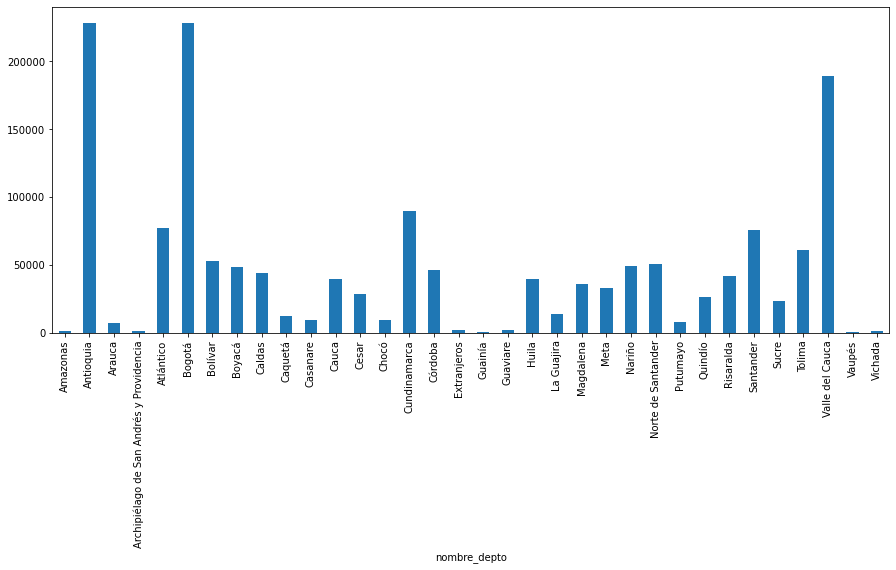

In [49]:
datoslimpios.groupby(['nombre_depto']).sum()['num_casos'].plot(kind = 'bar', figsize=(15, 6))

In [50]:
#Evento
evento1 = datoslimpios.groupby(by = ["evento"]).sum()

evento1['porcentaje_event'] = (evento1['num_casos'] / 
                  evento1['num_casos'].sum()) * 100
evento1


,anio,codigo_depto,codigo_muni,codigo_evento,num_casos,porcentaje_event
evento,,,,,,
ACC. CAUSADOS POR DISPARO DE ARMAS DE FUEGO,581805,12911,12091366,145945,305.0,0.019208
ACC. CAUSADOS POR MAQUINAS Y POR INSTR. CORTANTES/PUNZANTES,700542,14614,12880153,175392,375.0,0.023616
"ACC. TRANSPORTE TERRESTRE, INCLUSIVE SECUELAS",28969644,625166,566090631,7208889,46316.0,2.916772
"AGRESIONES (HOMICIDIOS), INCLUSIVE SECUELAS",29316857,650632,572284283,7456256,100943.0,6.356932
AHOGAMIENTO Y SUMERSION ACCIDENTALES,8690270,195063,172580636,2184402,5919.0,0.372752
...,...,...,...,...,...,...
TUMOR MALIGNO DE LA MAMA,11232071,224280,213443817,1160224,21102.0,1.328908
TUMOR MALIGNO DEL COLON,12821101,256031,244408849,1286134,18640.0,1.173863
TUMOR MALIGNO DEL ESTOMAGO,24539328,488277,473605987,2449587,37515.0,2.362525


<AxesSubplot:xlabel='evento'>

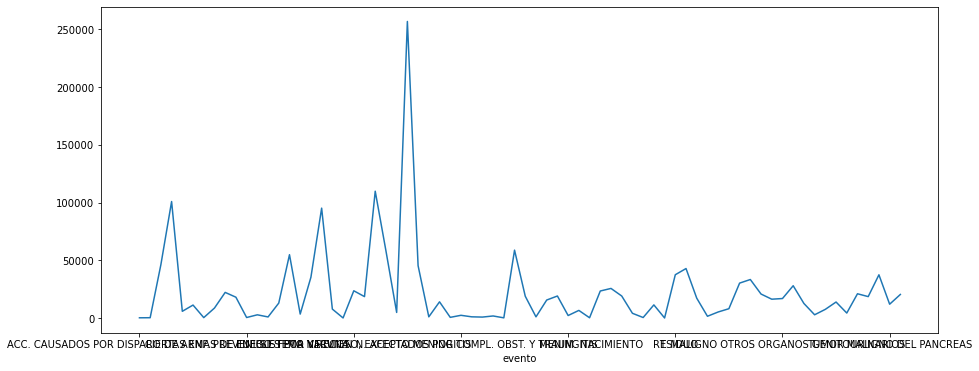

In [51]:
datoslimpios.groupby(['evento']).sum()['num_casos'].plot(kind = 'line', figsize=(15, 6))

In [52]:
#Municipio
municipio = datoslimpios.groupby(by = ["nombre_muni"]).sum()

municipio['porcentaje_mun'] = (municipio['num_casos'] / 
                  municipio['num_casos'].sum()) * 100
municipio


,anio,codigo_depto,codigo_muni,codigo_evento,num_casos,porcentaje_mun
nombre_muni,,,,,,
Abejorral,1030953,2560,2561024,195204,935.0,0.058882
Abriaquí,213375,530,530424,40569,117.0,0.007368
Acacías,2116270,52550,52556306,406972,2558.0,0.161091
Acandí,471128,6318,6319404,99705,279.0,0.017570
Acevedo,1018893,20746,20749036,199575,809.0,0.050947
...,...,...,...,...,...,...
Zipaquirá,2494883,30975,32088861,477981,3562.0,0.224319
Zona Bananera,1606842,37506,38288040,333203,1584.0,0.099753
Ábrego,1000819,26838,26839491,195251,945.0,0.059512


In [53]:
#Sexo
sex = datoslimpios.groupby(by = ["sexo"]).sum()

sex['porcentaje_sex'] = (sex['num_casos'] / 
                  sex['num_casos'].sum()) * 100
sex


,anio,codigo_depto,codigo_muni,codigo_evento,num_casos,porcentaje_sex
sexo,,,,,,
Hombres,514535714,10733904.0,9.831256e+09,101298265.0,882382.0,55.568417
Indeterminado,173133,3779.0,3.806586e+06,46291.0,99.0,0.006235
Mujeres,420857130,8511019.0,7.972268e+09,80281963.0,705439.0,44.425349


<AxesSubplot:xlabel='sexo'>

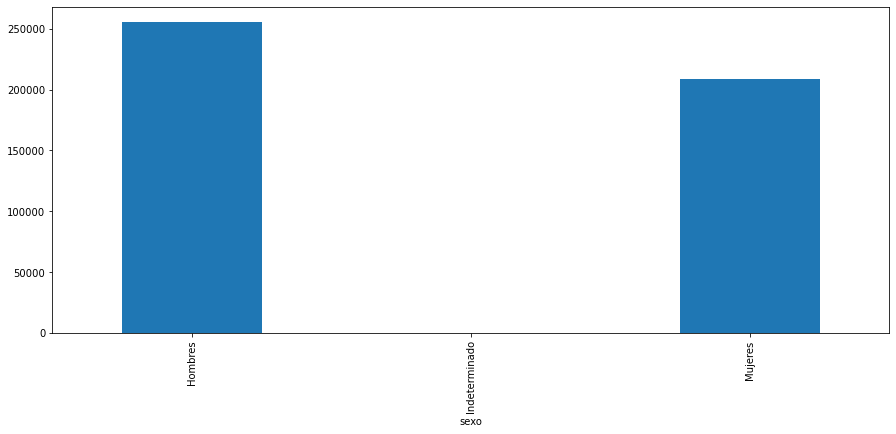

In [80]:
datoslimpios.groupby(['sexo']).count()['num_casos'].plot(kind = 'bar', figsize=(15, 6))

## Para ETL

In [90]:
#Genero
genero = pd.DataFrame()
genero['descripcion'] = datoslimpios['sexo']
genero

,descripcion
1750,Hombres
1751,Mujeres
1752,Hombres
1753,Mujeres
1754,Hombres
...,...
1244976,Hombres
1244980,Hombres
1244981,Hombres
1244982,Hombres


In [91]:
#Ubicacion
ubicacion = pd.DataFrame()
ubicacion['nombre_depto'] = datoslimpios['nombre_depto']
ubicacion['codigo_depto']=datoslimpios['codigo_depto']
ubicacion['nombre_muni']=datoslimpios['nombre_muni']
ubicacion['codigo_muni']=datoslimpios['codigo_muni']
ubicacion


,nombre_depto,codigo_depto,nombre_muni,codigo_muni
1750,Antioquia,5,Medellín,5001
1751,Antioquia,5,Medellín,5001
1752,Antioquia,5,Medellín,5001
1753,Antioquia,5,Medellín,5001
1754,Antioquia,5,Medellín,5001
...,...,...,...,...
1244976,Extranjeros,1001,Venezuela,75862
1244980,Extranjeros,1001,Venezuela,75862
1244981,Extranjeros,1001,Venezuela,75862
1244982,Extranjeros,1001,Venezuela,75862


In [92]:
#Causa
causa = pd.DataFrame()
causa['nombre'] = datoslimpios['evento']
causa

,nombre
1750,ENFERMEDADES INFECCIOSAS INTESTINALES
1751,ENFERMEDADES INFECCIOSAS INTESTINALES
1752,ENFERMEDADES INFECCIOSAS INTESTINALES
1753,ENFERMEDADES INFECCIOSAS INTESTINALES
1754,ENFERMEDADES INFECCIOSAS INTESTINALES
...,...
1244976,RESIDUO
1244980,"SINTOMAS, SIGNOS Y AFECCIONES MAL DEFINIDAS"
1244981,"SINTOMAS, SIGNOS Y AFECCIONES MAL DEFINIDAS"
1244982,"SINTOMAS, SIGNOS Y AFECCIONES MAL DEFINIDAS"


In [93]:
#Fecha
fecha = pd.DataFrame()
fecha['fecha'] = datoslimpios['anio']
fecha

,fecha
1750,2010
1751,2010
1752,2010
1753,2010
1754,2010
...,...
1244976,2017
1244980,2017
1244981,2017
1244982,2017


In [95]:
#Edad
edad = pd.DataFrame()
edad['edad'] = datoslimpios['edad']
edad

,edad
1750,De 15-44 años
1751,De 15-44 años
1752,De 45-64 años
1753,De 45-64 años
1754,De 65 y más
...,...
1244976,De 65-84 años
1244980,De 1-4 años
1244981,De 15-44 años
1244982,De 65-84 años


## Extraer CSVs

In [96]:
#Ubicacion
ubicacion.to_csv("ubicacion.csv", encoding='utf-8', index=False)

In [97]:
#Genero
genero.to_csv("genero.csv", encoding='utf-8', index=False)

In [98]:
#Causa
causa.to_csv("causa.csv", encoding='utf-8', index=False)

In [99]:
#Fecha
fecha.to_csv("fecha.csv", encoding='utf-8', index=False)

In [100]:
#Edad
edad.to_csv("edad.csv", encoding='utf-8', index=False)

## Extraer csvs para tableros

In [101]:
#Dataframe completo
datoslimpios.to_csv("datoslimpios.csv", encoding='utf-8', index=False)

In [102]:
#Region
region.to_csv("region.csv", encoding='utf-8', index=False)

In [103]:
#Evento1
evento1.to_csv("evento1.csv", encoding='utf-8', index=False)

In [104]:
#Municipio
municipio.to_csv("municipio.csv", encoding='utf-8', index=False)

In [105]:
#Municipio
sex.to_csv("sexo.csv", encoding='utf-8', index=False)